In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
df = df.reindex(pd.date_range(df.index[0],df.index[-1], freq='B'))
print(df.index.freq)
print(df.index)
df.head(10)

<BusinessDay>
DatetimeIndex(['2012-11-16', '2012-11-19', '2012-11-20', '2012-11-21',
               '2012-11-22', '2012-11-23', '2012-11-26', '2012-11-27',
               '2012-11-28', '2012-11-29',
               ...
               '2017-11-02', '2017-11-03', '2017-11-06', '2017-11-07',
               '2017-11-08', '2017-11-09', '2017-11-10', '2017-11-13',
               '2017-11-14', '2017-11-15'],
              dtype='datetime64[ns]', length=1304, freq='B')


,Open,High,Low,Close,Adj Close,Volume
2012-11-16,75.028572,75.714287,72.250000,75.382858,68.175804,316723400.0
2012-11-19,77.244286,81.071426,77.125717,80.818573,73.091835,205829400.0
2012-11-20,81.701431,81.707146,79.225716,80.129997,72.469093,160688500.0
2012-11-21,80.607140,81.052856,79.514282,80.242859,72.571182,93250500.0
2012-11-22,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-23,81.024284,81.714287,80.371429,81.642860,73.837326,68206600.0
2012-11-26,82.271431,84.285713,81.958572,84.218575,76.166786,157644900.0
2012-11-27,84.221428,84.345711,82.871429,83.540001,75.553101,133332500.0
2012-11-28,82.467140,83.685715,81.751427,83.277145,75.315369,130216100.0
2012-11-29,84.317146,84.892860,83.607140,84.194283,76.144821,128674700.0


In [3]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as pylt
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with pylt.style.context(style):    
        fig = pylt.figure(figsize=figsize)

        layout = (3, 2)
        ts_ax = pylt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = pylt.subplot2grid(layout, (1, 0))
        pacf_ax = pylt.subplot2grid(layout, (1, 1))
        qq_ax = pylt.subplot2grid(layout, (2, 0))
        pp_ax = pylt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        pylt.tight_layout()
    return 

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [5]:
ts = df['Close'].dropna()
ts.head(10)

2012-11-16    75.382858
2012-11-19    80.818573
2012-11-20    80.129997
2012-11-21    80.242859
2012-11-23    81.642860
2012-11-26    84.218575
2012-11-27    83.540001
2012-11-28    83.277145
2012-11-29    84.194283
2012-11-30    83.611427
Name: Close, dtype: float64

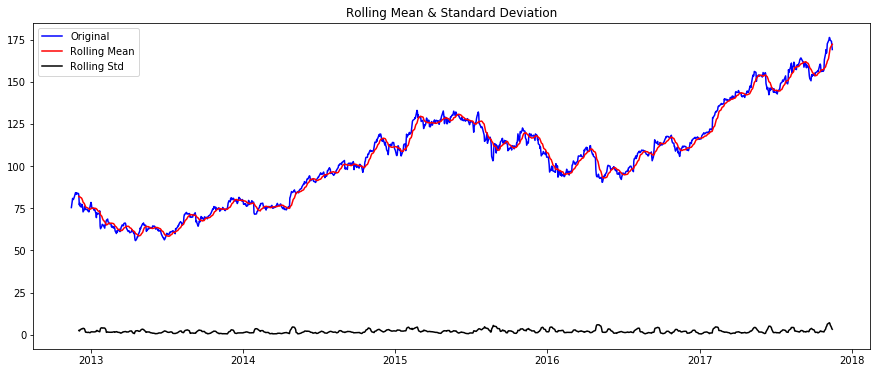

Results of Dickey-Fuller Test:
Test Statistic                    0.078719
p-value                           0.964578
#Lags Used                        0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64


In [6]:
test_stationarity(ts)

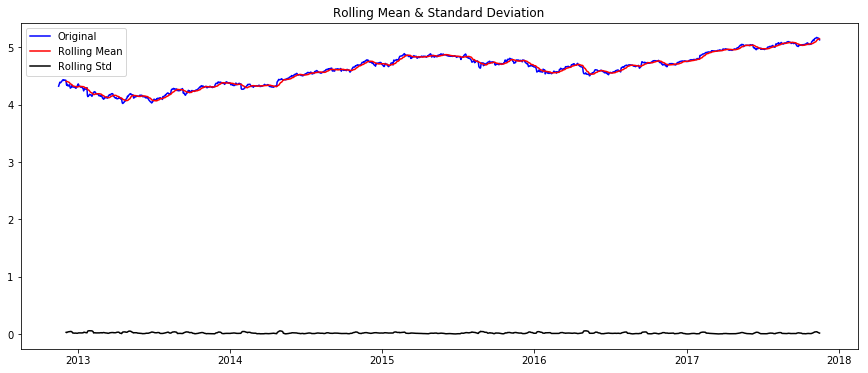

Results of Dickey-Fuller Test:
Test Statistic                   -0.165314
p-value                           0.942532
#Lags Used                        8.000000
Number of Observations Used    1250.000000
Critical Value (1%)              -3.435592
Critical Value (5%)              -2.863855
Critical Value (10%)             -2.568003
dtype: float64


In [7]:
ts_log = np.log(ts)
test_stationarity(ts_log)

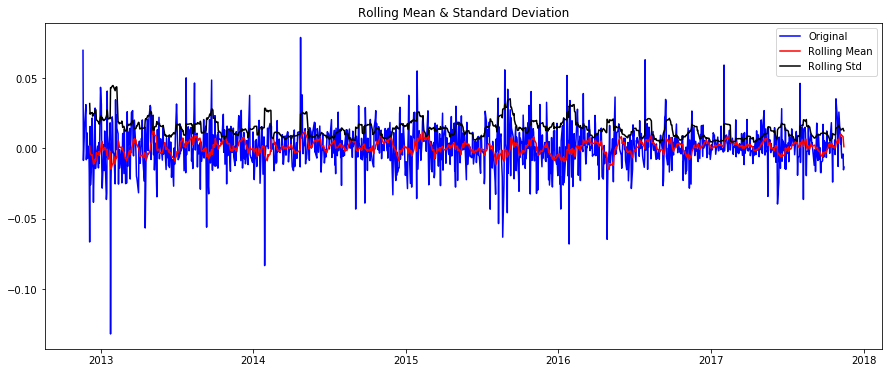

Results of Dickey-Fuller Test:
Test Statistic                -1.285132e+01
p-value                        5.345185e-24
#Lags Used                     7.000000e+00
Number of Observations Used    1.250000e+03
Critical Value (1%)           -3.435592e+00
Critical Value (5%)           -2.863855e+00
Critical Value (10%)          -2.568003e+00
dtype: float64


In [8]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

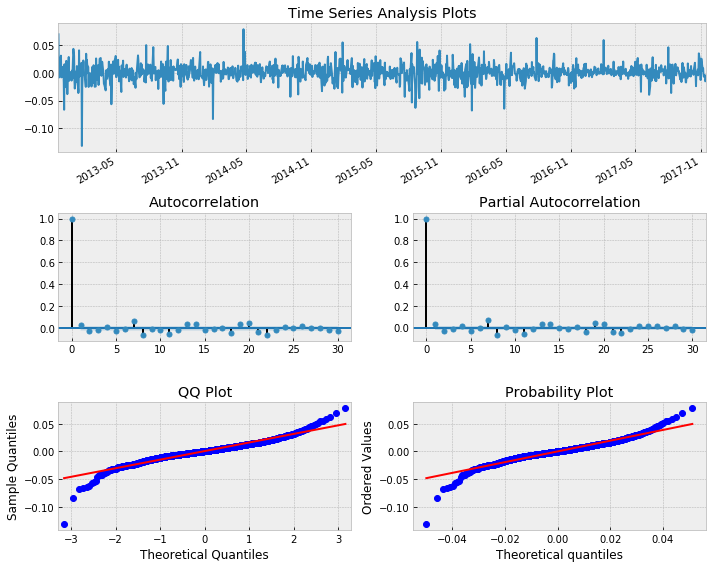

In [9]:
tsplot(ts_log_diff, lags=30)

In [16]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages
# Define the p, d and q parameters to take any value between 0 and 2 and s between 0 to 13
p = d = q = range(0, 2)
s = range(0,13)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdqs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(p, d, q, s))]

for param in pdq:
    for param_seasonal in seasonal_pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Close'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 0) - AIC:13796.656921351896
ARIMA(0, 0, 0)x(0, 0, 1, 1) - AIC:13796.656921351896
ARIMA(0, 0, 0)x(0, 0, 1, 2) - AIC:13788.88931503881
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:13781.814149850863
ARIMA(0, 0, 0)x(0, 0, 1, 4) - AIC:13791.11185283384
ARIMA(0, 0, 0)x(0, 0, 1, 5) - AIC:13766.78843724716
ARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:13778.206391660127
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:13766.363108994263
ARIMA(0, 0, 0)x(0, 0, 1, 8) - AIC:13759.512337931013
ARIMA(0, 0, 0)x(0, 0, 1, 9) - AIC:13746.975502427826
ARIMA(0, 0, 0)x(0, 0, 1, 10) - AIC:13738.10030018268
ARIMA(0, 0, 0)x(0, 0, 1, 11) - AIC:13742.64688082914
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:13726.531794104567
ARIMA(0, 0, 0)x(0, 1, 1, 1) - AIC:4682.764586324863
ARIMA(0, 0, 0)x(0, 1, 1, 2) - AIC:5586.213683123419
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:6070.371884172735
ARIMA(0, 0, 0)x(0, 1, 1, 4) - AIC:6379.714970267495
ARIMA(0, 0, 0)x(0, 1, 1, 5) - AIC:6658.387817852538
ARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:6879.432838738745
A

ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:6114.585578967653
ARIMA(0, 0, 1)x(1, 1, 0, 8) - AIC:6227.5575452427875
ARIMA(0, 0, 1)x(1, 1, 0, 9) - AIC:6344.109825758298
ARIMA(0, 0, 1)x(1, 1, 0, 10) - AIC:6426.173354683836
ARIMA(0, 0, 1)x(1, 1, 0, 11) - AIC:6544.488645461282
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:6587.917135161777
ARIMA(0, 0, 1)x(1, 1, 1, 1) - AIC:4682.943241975176
ARIMA(0, 0, 1)x(1, 1, 1, 2) - AIC:4686.288252697315
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:5493.013504210881
ARIMA(0, 0, 1)x(1, 1, 1, 4) - AIC:5508.638059947698
ARIMA(0, 0, 1)x(1, 1, 1, 5) - AIC:5861.958247406268
ARIMA(0, 0, 1)x(1, 1, 1, 6) - AIC:5954.99959768082
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:6102.82932700675
ARIMA(0, 0, 1)x(1, 1, 1, 8) - AIC:6215.805705104172
ARIMA(0, 0, 1)x(1, 1, 1, 9) - AIC:6331.907286458141
ARIMA(0, 0, 1)x(1, 1, 1, 10) - AIC:6410.5616471731855
ARIMA(0, 0, 1)x(1, 1, 1, 11) - AIC:6531.149510103925
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:6577.196488650174
ARIMA(0, 1, 0)x(0, 0, 1, 0) - AIC:4682.764586324863
ARIMA(

ARIMA(0, 1, 1)x(1, 0, 1, 1) - AIC:4682.943241975176
ARIMA(0, 1, 1)x(1, 0, 1, 2) - AIC:4682.406960484768
ARIMA(0, 1, 1)x(1, 0, 1, 3) - AIC:4678.165267946277
ARIMA(0, 1, 1)x(1, 0, 1, 4) - AIC:4673.162492213756
ARIMA(0, 1, 1)x(1, 0, 1, 5) - AIC:4671.785495421156
ARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:4667.751541761148
ARIMA(0, 1, 1)x(1, 0, 1, 7) - AIC:4664.3909671580495
ARIMA(0, 1, 1)x(1, 0, 1, 8) - AIC:4662.149833881284
ARIMA(0, 1, 1)x(1, 0, 1, 9) - AIC:4651.691141234951
ARIMA(0, 1, 1)x(1, 0, 1, 10) - AIC:4656.316844032397
ARIMA(0, 1, 1)x(1, 0, 1, 11) - AIC:4639.660887836804
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:4636.909502392176
ARIMA(0, 1, 1)x(1, 1, 0, 1) - AIC:4686.2243619084875
ARIMA(0, 1, 1)x(1, 1, 0, 2) - AIC:5176.205285013823
ARIMA(0, 1, 1)x(1, 1, 0, 3) - AIC:5242.4286116555595
ARIMA(0, 1, 1)x(1, 1, 0, 4) - AIC:5171.714323362594
ARIMA(0, 1, 1)x(1, 1, 0, 5) - AIC:5176.702818167072
ARIMA(0, 1, 1)x(1, 1, 0, 6) - AIC:5227.602754421353
ARIMA(0, 1, 1)x(1, 1, 0, 7) - AIC:5075.387717580923
ARIMA(

ARIMA(1, 0, 1)x(0, 0, 1, 8) - AIC:4667.503189088973
ARIMA(1, 0, 1)x(0, 0, 1, 9) - AIC:4659.08338533479
ARIMA(1, 0, 1)x(0, 0, 1, 10) - AIC:4658.27065276901
ARIMA(1, 0, 1)x(0, 0, 1, 11) - AIC:4660.645332340162
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:4637.370546712971
ARIMA(1, 0, 1)x(0, 1, 0, 1) - AIC:4684.609230353709
ARIMA(1, 0, 1)x(0, 1, 0, 2) - AIC:4687.8842649217095
ARIMA(1, 0, 1)x(0, 1, 0, 3) - AIC:5324.51625926296
ARIMA(1, 0, 1)x(0, 1, 0, 4) - AIC:5300.3538063405895
ARIMA(1, 0, 1)x(0, 1, 0, 5) - AIC:5397.853926645112
ARIMA(1, 0, 1)x(0, 1, 0, 6) - AIC:5470.135784001223
ARIMA(1, 0, 1)x(0, 1, 0, 7) - AIC:5394.889338050625
ARIMA(1, 0, 1)x(0, 1, 0, 8) - AIC:5469.848232415077
ARIMA(1, 0, 1)x(0, 1, 0, 9) - AIC:5407.758875065447
ARIMA(1, 0, 1)x(0, 1, 0, 10) - AIC:5458.823134660914
ARIMA(1, 0, 1)x(0, 1, 0, 11) - AIC:5508.951151060262
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:5510.730299050445
ARIMA(1, 0, 1)x(0, 1, 1, 1) - AIC:4682.943240930395
ARIMA(1, 0, 1)x(0, 1, 1, 2) - AIC:4685.689867146743
ARIMA(1

ARIMA(1, 1, 0)x(1, 1, 0, 4) - AIC:5161.056708977281
ARIMA(1, 1, 0)x(1, 1, 0, 5) - AIC:5170.537710474774
ARIMA(1, 1, 0)x(1, 1, 0, 6) - AIC:5208.557744114149
ARIMA(1, 1, 0)x(1, 1, 0, 7) - AIC:5065.493923881606
ARIMA(1, 1, 0)x(1, 1, 0, 8) - AIC:5166.511438960819
ARIMA(1, 1, 0)x(1, 1, 0, 9) - AIC:5091.692403854289
ARIMA(1, 1, 0)x(1, 1, 0, 10) - AIC:5067.879644917075
ARIMA(1, 1, 0)x(1, 1, 0, 11) - AIC:5126.905798297606
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:5128.444716630571
ARIMA(1, 1, 0)x(1, 1, 1, 1) - AIC:4688.202200134627
ARIMA(1, 1, 0)x(1, 1, 1, 2) - AIC:4689.844254229141
ARIMA(1, 1, 0)x(1, 1, 1, 3) - AIC:4688.271250582346
ARIMA(1, 1, 0)x(1, 1, 1, 4) - AIC:4684.450267980999
ARIMA(1, 1, 0)x(1, 1, 1, 5) - AIC:4670.171454355295
ARIMA(1, 1, 0)x(1, 1, 1, 6) - AIC:4667.821393421067
ARIMA(1, 1, 0)x(1, 1, 1, 7) - AIC:4660.368250403815
ARIMA(1, 1, 0)x(1, 1, 1, 8) - AIC:4660.92687100424
ARIMA(1, 1, 0)x(1, 1, 1, 9) - AIC:4670.2007062115545
ARIMA(1, 1, 0)x(1, 1, 1, 10) - AIC:4644.651426902787
ARIMA(1,

In [17]:
#ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:4634.909942938197

In [10]:
model = sm.tsa.statespace.SARIMAX(df['Close'], order=(0,1,1), seasonal_order=(0,0,1,2))
results_season = model.fit(disp=-1)

In [11]:
df['forecast'] = results_season.predict(start = 1, end = 1304)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,forecast
2017-11-02,166.600006,168.500000,165.279999,168.110001,167.507828,41393400.0,166.778332
2017-11-03,174.000000,174.259995,171.119995,172.500000,171.882111,59398600.0,168.192761
2017-11-06,172.369995,174.990005,171.720001,174.250000,173.625839,35026300.0,172.574190
2017-11-07,173.910004,175.250000,173.600006,174.809998,174.183823,24361500.0,174.185273
2017-11-08,174.660004,176.240005,174.330002,176.240005,175.608719,24409500.0,174.781889
2017-11-09,175.110001,176.100006,173.139999,175.880005,175.250000,29482600.0,176.259457
2017-11-10,175.110001,175.380005,174.270004,174.669998,174.669998,25145500.0,175.834829
2017-11-13,173.500000,174.500000,173.399994,173.970001,173.970001,16982100.0,174.649877
2017-11-14,173.039993,173.479996,171.179993,171.339996,171.339996,24782500.0,173.981972
2017-11-15,169.970001,170.320007,168.380005,169.080002,169.080002,28773400.0,171.292622


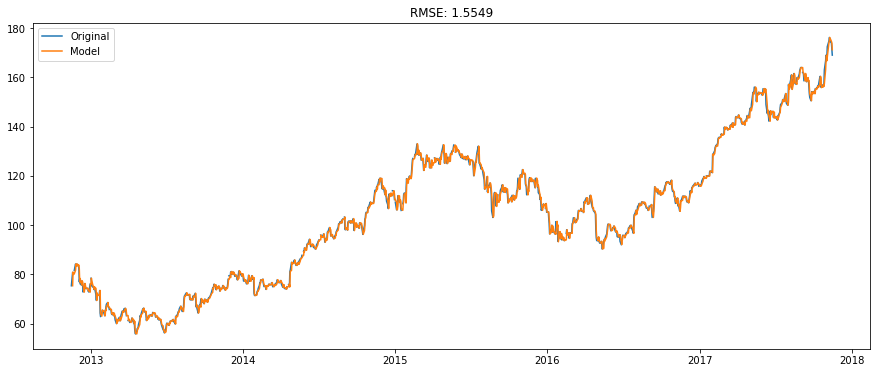

In [12]:
df_temp = df[[ 'Close','forecast']].dropna()
plt.plot(df['Close'], label='Original')
plt.plot(df['forecast'], label='Model')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((df_temp['forecast'] - df_temp['Close'])**2)/len(df_temp['Close'])))

In [13]:
from pandas.tseries.offsets import DateOffset

In [14]:
future_dates =[df.index[-1] + DateOffset(days=x) for x in range(1,20)]

In [15]:
future_dates

[Timestamp('2017-11-16 00:00:00'),
 Timestamp('2017-11-17 00:00:00'),
 Timestamp('2017-11-18 00:00:00'),
 Timestamp('2017-11-19 00:00:00'),
 Timestamp('2017-11-20 00:00:00'),
 Timestamp('2017-11-21 00:00:00'),
 Timestamp('2017-11-22 00:00:00'),
 Timestamp('2017-11-23 00:00:00'),
 Timestamp('2017-11-24 00:00:00'),
 Timestamp('2017-11-25 00:00:00'),
 Timestamp('2017-11-26 00:00:00'),
 Timestamp('2017-11-27 00:00:00'),
 Timestamp('2017-11-28 00:00:00'),
 Timestamp('2017-11-29 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2017-12-02 00:00:00'),
 Timestamp('2017-12-03 00:00:00'),
 Timestamp('2017-12-04 00:00:00')]

In [16]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

In [17]:
final_df = pd.concat([df, future_df])
final_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,forecast
2017-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
final_df['forecast'] = results_season.predict(start = 1, end = 1320)
final_df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,forecast
2017-11-15,169.970001,170.320007,168.380005,169.080002,169.080002,28773400.0,171.292622
2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,169.090641
2017-11-17,NaN,NaN,NaN,NaN,NaN,NaN,169.146117
2017-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-20,NaN,NaN,NaN,NaN,NaN,NaN,169.147436
2017-11-21,NaN,NaN,NaN,NaN,NaN,NaN,169.147436
2017-11-22,NaN,NaN,NaN,NaN,NaN,NaN,169.147436
2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,169.147436
2017-11-24,NaN,NaN,NaN,NaN,NaN,NaN,169.147436


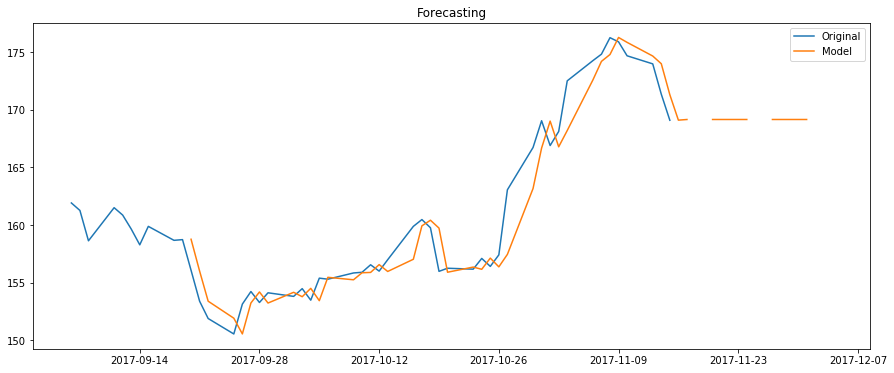

In [19]:
plt.plot(final_df['Close'].tail(70), label='Original')
plt.plot(final_df['forecast'].tail(60), label='Model')
plt.title('Forecasting')
plt.legend(loc='best')